

# Lab Session: Dimension reduction
Professor: <span style="color:blue">lucas.drumetz@imt-atlantique.fr</span>

The goal of this lab is to get familiar with the concept of dimension reduction and visualization for high-dimensional data, using Principal Component Analysis (PCA)

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.decomposition import PCA

C:\Users\vrace\conda\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Principal Component Analysis

The goal of this section is to perform PCA on a real hyperspectral dataset to see how it can help visualize, compress and interpret high dimensional remote sensing data. We will make use of the functions implemented in sci-kit learn, the standard Machine Learning Package for Python.

The data is provided courtesy of Naoto Yokoya and Japan Space Systems (only for this lab, please do not distribute). See

Matsuki, T., Yokoya, N., & Iwasaki, A. (2015). Hyperspectral tree species classification of Japanese complex mixed forest with the aid of LiDAR data. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 8(5), 2177-2187.

for more details.

First we load and visualize the data:

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.decomposition import PCA

(207, 268)


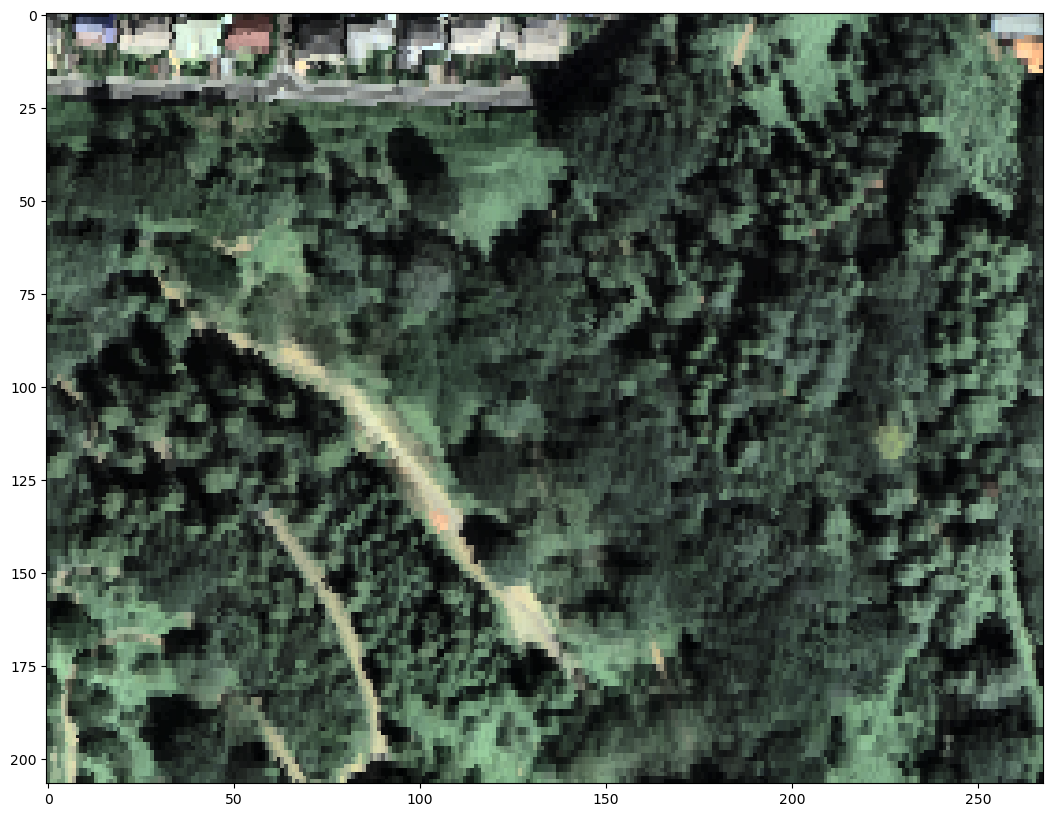

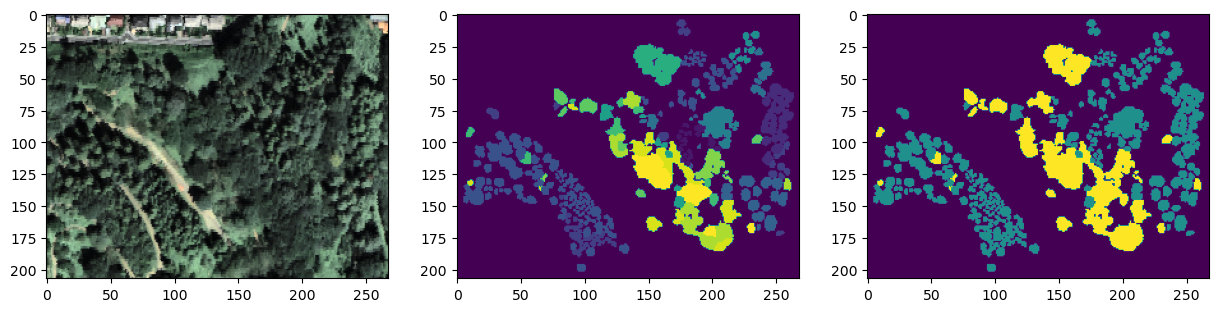

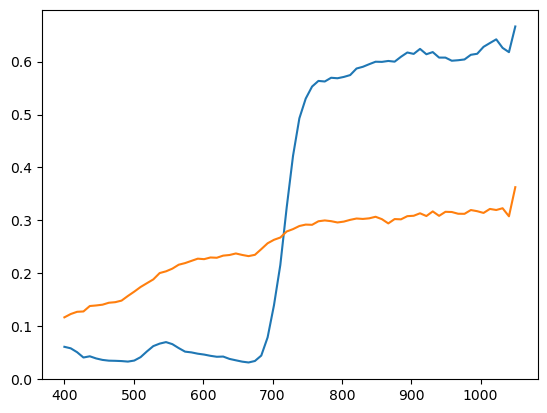

In [2]:
data = sio.loadmat("CASI3_North.mat")
rgb_data = sio.loadmat("rgb.mat")
classinfo = sio.loadmat("GT_North.mat")

wavelengths = np.linspace(400,1050,72) # 72 wavelenghts in the visible and near IR

im = data['hyper'].astype("double")


im = (im - np.amin(im))/(np.amax(im) - np.amin(im)) # rescale data between 0 and 1

imrgb = rgb_data['rgb_adjust']

class_img = classinfo['class']

# get labels for both classes: conifer trees and broadleaf trees

binary_class_img = np.zeros(np.shape(class_img))

print(binary_class_img.shape)

binary_class_img[class_img <=9] = 1 # conifer
binary_class_img[class_img >9] = 2 # broadleaf
binary_class_img[class_img == 0] = 0 # unclassified


# display

plt.figure(figsize=(15,10))
plt.imshow(imrgb)

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(imrgb)
plt.subplot(132)
plt.imshow(class_img)
plt.subplot(133)
plt.imshow(binary_class_img)

plt.figure()
plt.plot(wavelengths, im[50,50,:]) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:]) # one man made pixel





**Q: What are the main broad classes of materials that are present in the image?**

Vegetation and man-made material.

(72, 7726)
(72, 4895)


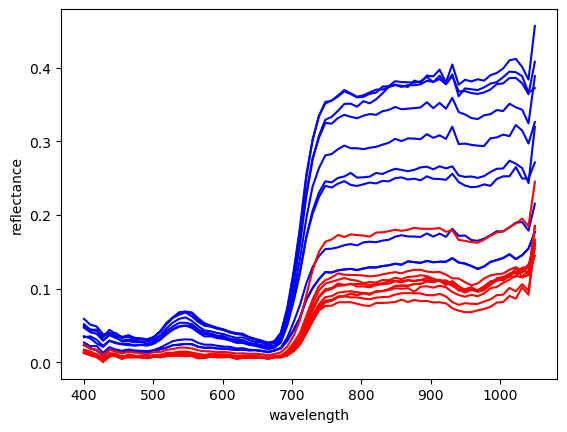

555.6338028169014
702.1126760563379


In [3]:
# %matplotlib qt
%matplotlib inline

[m,n,L] = np.shape(im)
im_r = np.reshape(im,(m*n,L)).T # we reshape the data cube into a matrix of size LxN, with L the number
# of wavelgnths and N the number of pixels

conifer_pixels = im[binary_class_img == 1,:].T
print(conifer_pixels.shape)

broadleaf_pixels = im[binary_class_img == 2,:].T
print(broadleaf_pixels.shape)


plt.figure()
plt.plot(wavelengths,conifer_pixels[:,0:10], 'b')
plt.plot(wavelengths,broadleaf_pixels[:,0:10],'r')
plt.xlabel('wavelength')
plt.ylabel('reflectance')
plt.show()

print(wavelengths[17])
print(wavelengths[33])

**Q: What are the main differences between spectra of conifer and broadleaf trees?**

Conifer trees have a larger reflectance values in the red spectra. (usually)

**Q: First plot the mean value of the data (the mean spectrum over all pixels). Does it look more like a vegetation spectrum or the spectrum of some man-made material? Why?**

In [4]:
im.shape

(207, 268, 72)

In [5]:
n_r,n_c,n_b = im.shape
reshape_im = np.reshape(im,(n_r*n_c,n_b))
print(reshape_im.shape)

(55476, 72)


In [6]:
type(im)

mean_array = np.mean(reshape_im)
print(mean_array)

0.1875820791411334


Well, it is hard to tell anything as our vegetation data has really high reflectance in the red part of the spectrum, but really low in the blue part. And although man-made objects has more stable value, that stable reflactance in all bends is closer to mean value of the whole image. Thus, this mean value make sense, but it is not possible to define the material based on mean value.

We will use the built-in scikit learn functions to represent the principal components and the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**Q: Use the PCA class to compute the decomposition, using pca.fit, with 72 components (all of them).\
Plot the eigenvalues, together with the explained variance as functions of the component number, you can recover them with pca.singular_values_ and pca.explained_variance_ratio_.**

**Similarly, use pca.components to recover the components, and plot them. What do they look like and what are their dimensions?** 

**Finally, compute the coefficients of the decomposition using pca.transform. What are their dimensions?**

**You can represent them as images, if you reshape them (use the function numpy.reshape for that).**

**Can you interpret some of the components using the coefficients as well as the components themselves (what do they represent)?**


(55476, 72)


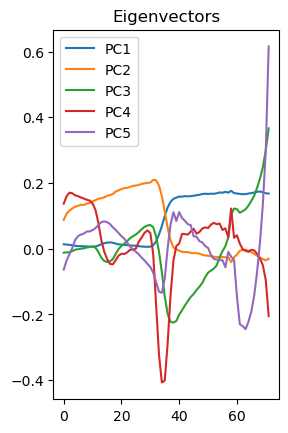

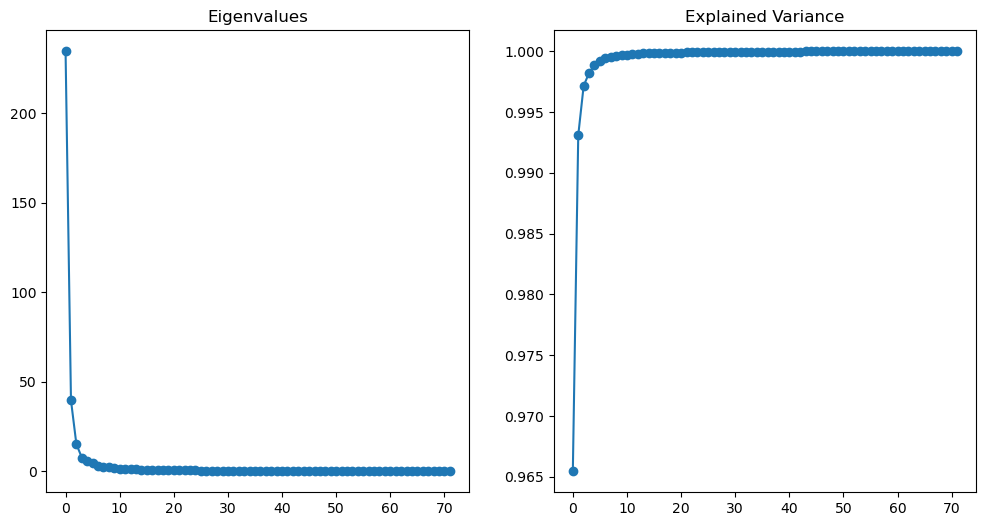

In [7]:
# PCA components

# Compute the PCA

n_components = 72
pca = PCA(n_components=n_components)

# Reshape image
n_r,n_c,n_b = im.shape
reshape_im = np.reshape(im,(n_r*n_c,n_b))
print(reshape_im.shape)

# Fit PCA
pca.fit(reshape_im)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_.shape)

# Eigen vectors
plt.subplot(1, 2, 2)
for i in range(5):  # Plot the first 5 components (you can adjust this)
    plt.plot(pca.components_[i], label=f'PC{i + 1}')

plt.title('Eigenvectors')
plt.legend()
plt.show()

# Get eigenvalues
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.singular_values_, marker='o')
plt.title('Eigenvalues')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance')
plt.show()



    On the plots above we can see:
    
        - we can see that the first principal component has found the highest variance in our data based on the last half of the bands.
        - although second principal component, has high value in the first part of the bands, it does not capture as significant variance as the PC1, as we can see on the plot with the title 'Eignevalues'
        - on the third plot, we can see that the 0.967 of our variance is explained by the PC1, and 0.994 by PC1 and PC2

### Display principal components and coefficients

Components are plotted in the previous cell.

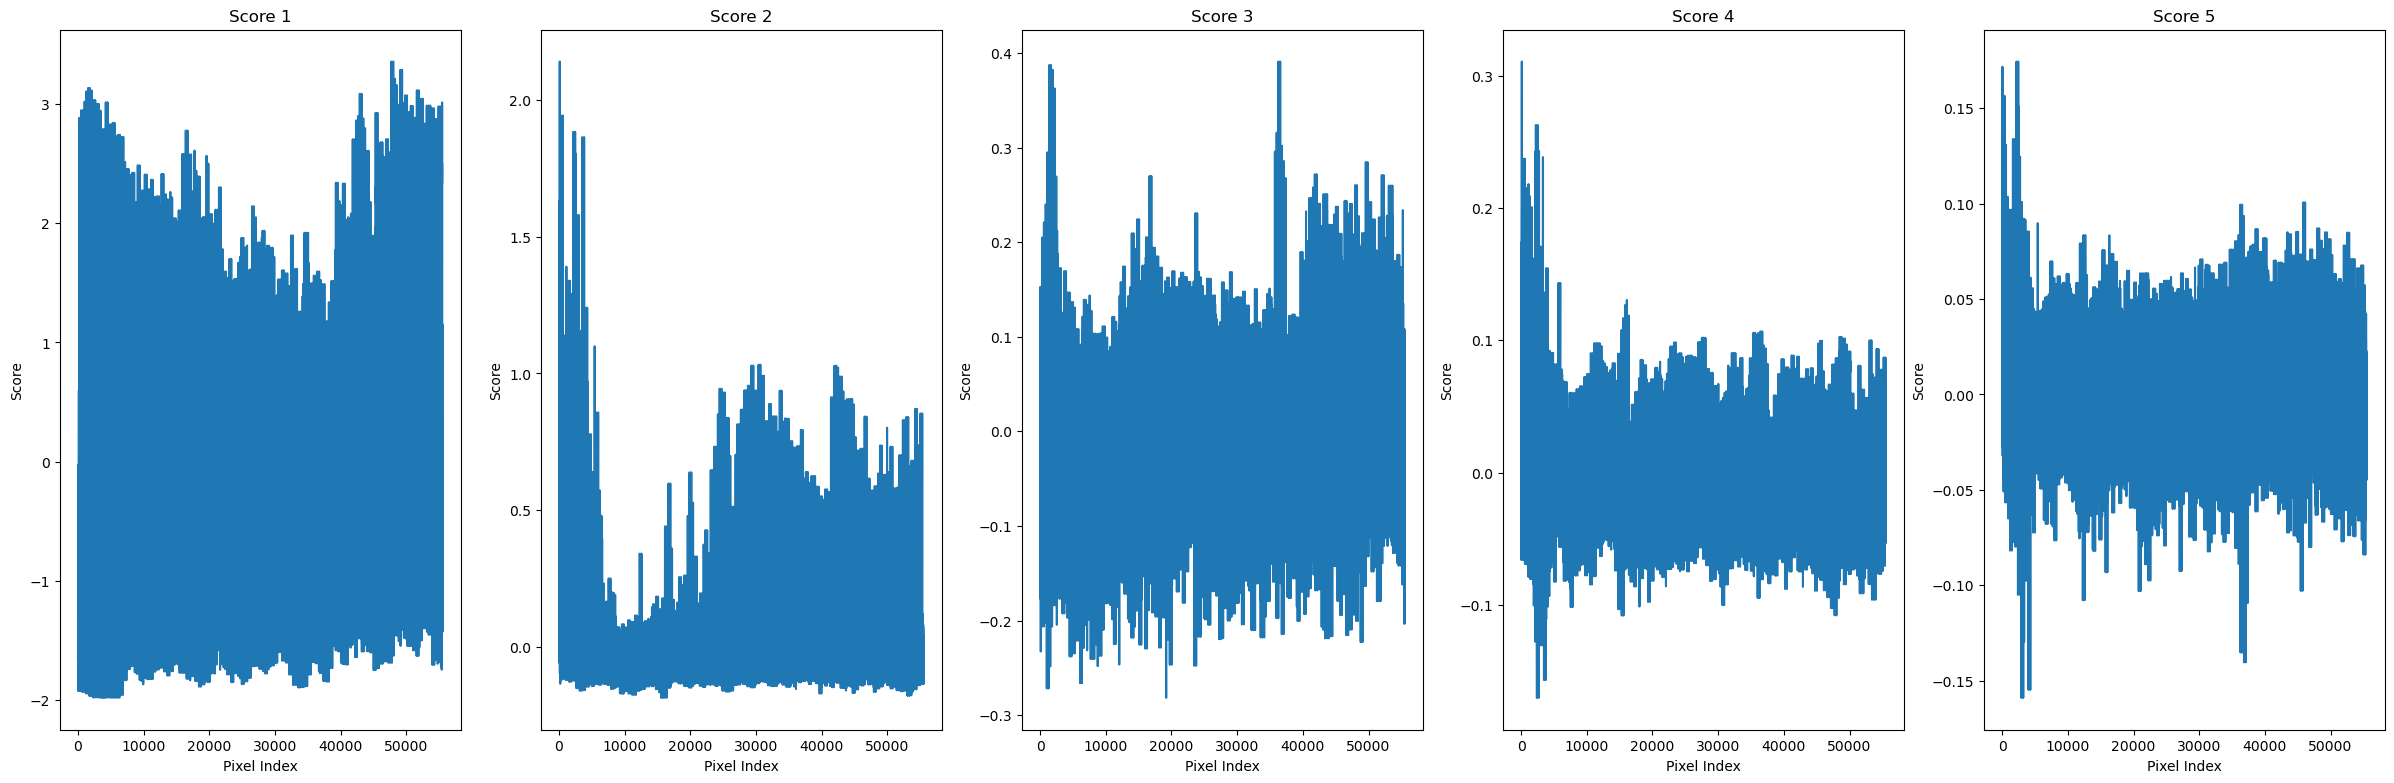

In [8]:
scores = pca.transform(reshape_im)
# Display both components and scores together
plt.figure(figsize=(30, 20))

n_components_displayed = 5  # You can adjust this based on your preference
    
# Plot the scores
for i in range(n_components_displayed):
    plt.subplot(2, n_components_displayed, i + 1)
    plt.plot(scores[:, i])
    plt.title(f'Score {i + 1}')
    plt.xlabel('Pixel Index')
    plt.ylabel('Score')

plt.show()

On the plot above we can see that first component has higher range of scores which indicates that it indeed can better discriminiate between our pixles. Each of the next components have lower range of scores, thus they capture lower variance of the data.

**Q: Almost all the variance in the data is explained by only a few components: are they interpretable? What parts of the image do they explain, respectively?**

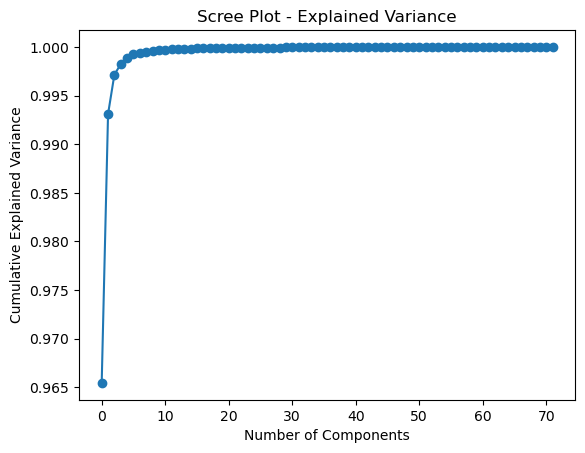

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Scree Plot - Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


First component explain around 96.5%, second around 3% and all others 0.5%.

We define a function to enhance the brigthness of an RGB image:

In [10]:
# from skimage import color, exposure

def enhance_brightness_rgb(rgb_original):
    yuv= color.rgb2yuv(rgb_original) # change color space to radiance, chrominance
    p_low, p_high = np.percentile(yuv[:,:,0], (0.1,99.9)) # saturate outlier values in radiance (0.1,99.9)
    yuv[:,:,0] = exposure.rescale_intensity(yuv[:,:,0], in_range=(p_low, p_high)) # rescale radiance
    mod_rgb =  color.yuv2rgb(yuv) # transform back to rgb space
    return mod_rgb


**Q: The dataset can be projected in the 2D latent space given by the first 2 principal components (each pixel is represented only by the first two coefficients of the PCA decomposition). Make a scatterplot of the data points in the space spanned by the first 2 eigenvectors. Can you locate vegetation pixels, and others?**

You can use as colors the binary image with the class labels to spot conifer and broadleaf pixels.

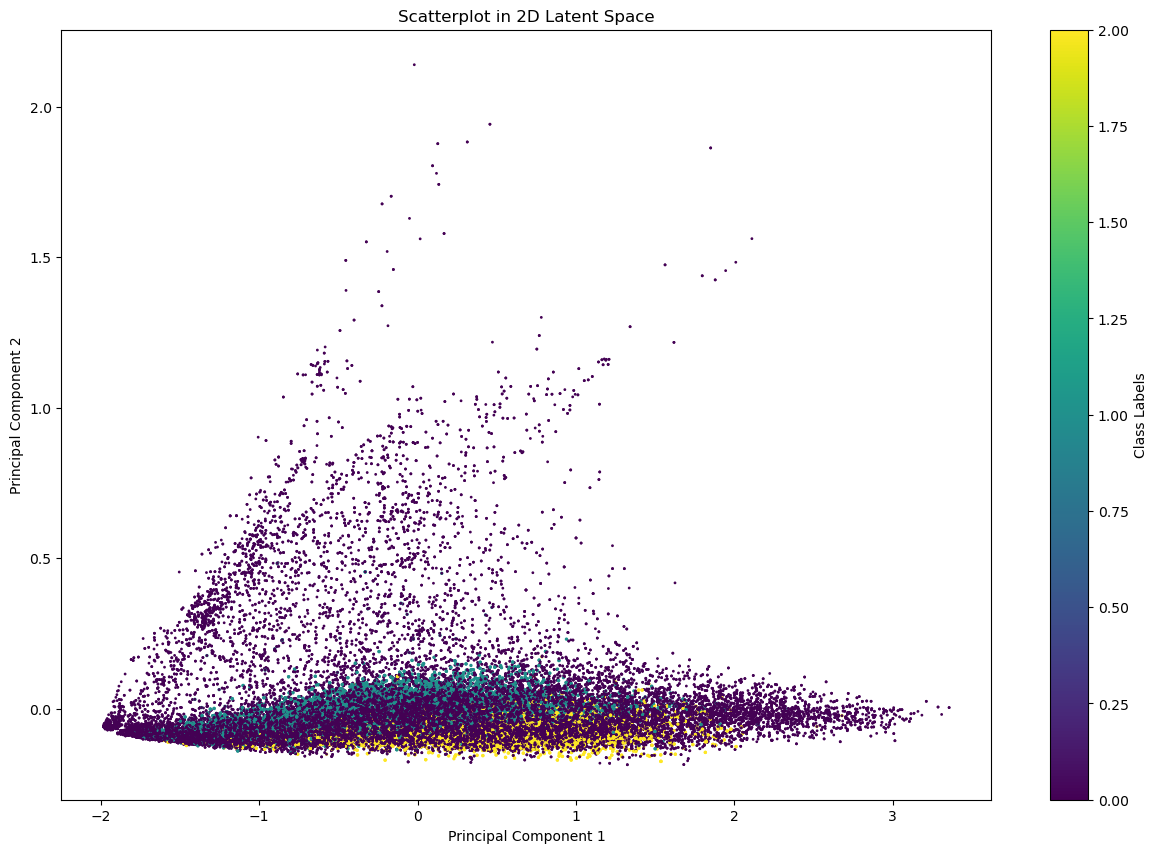

In [11]:
# Project data onto the first 2 principal components
projection_2d = pca.transform(reshape_im)[:, :2]

# Scatterplot with colors based on binary class labels
plt.figure(figsize=(15, 10))
plt.scatter(projection_2d[:, 0], projection_2d[:, 1], c=binary_class_img.ravel(), s=(1 + (binary_class_img.ravel() != 0)))

# Add labels and a colorbar
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot in 2D Latent Space')
plt.colorbar(label='Class Labels')

plt.show()


### Ploting only two classes of trees

Here there are plots of only two tree classes to better see the difference/separability.

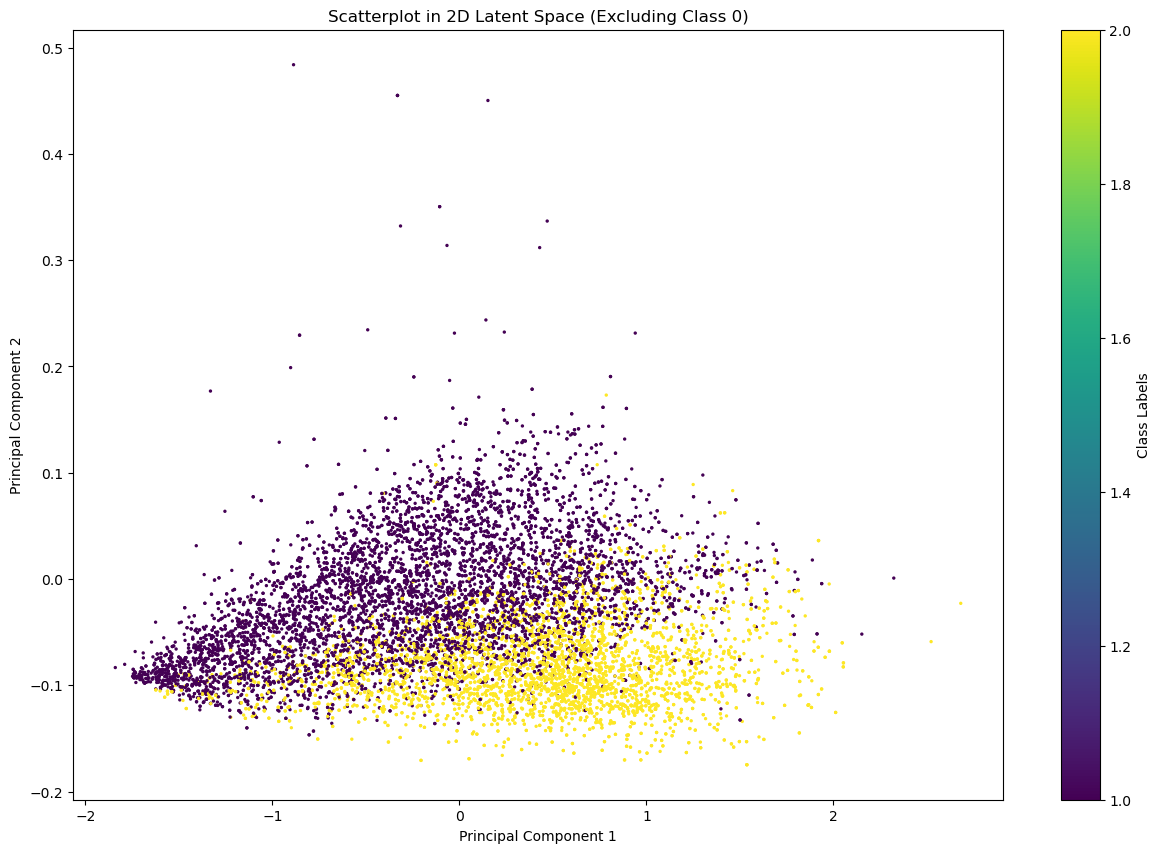

In [12]:
# Filter data for classes 1 and 2
mask = (binary_class_img.ravel() != 0)
projection_2d_filtered = projection_2d[mask]
class_labels_filtered = binary_class_img.ravel()[mask]

# Scatterplot with colors based on filtered binary class labels
plt.figure(figsize=(15, 10))
plt.scatter(projection_2d_filtered[:, 0], projection_2d_filtered[:, 1], c=class_labels_filtered, s=(1 + (class_labels_filtered != 0)))

# Add labels and a colorbar
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot in 2D Latent Space (Excluding Class 0)')
plt.colorbar(label='Class Labels')

plt.show()


<IPython.core.display.Javascript object>


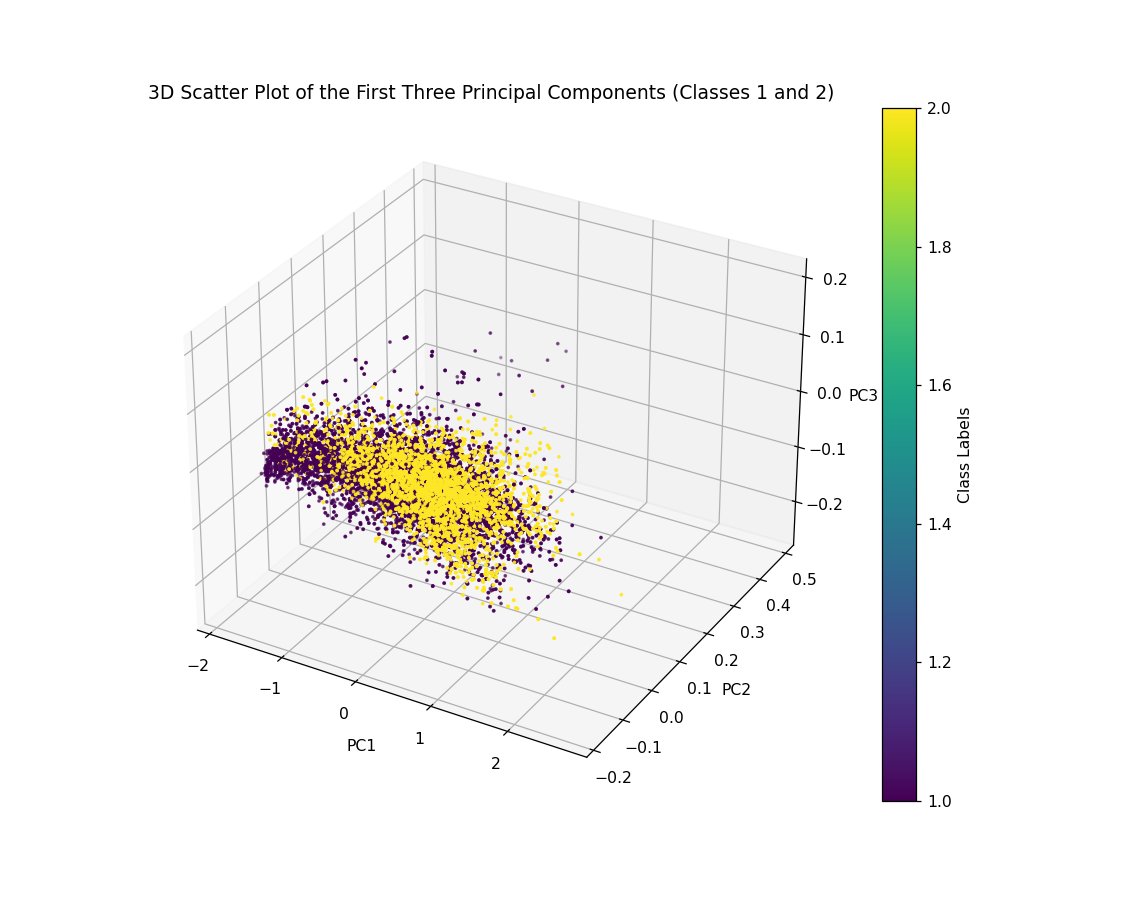

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming pca is your PCA object and reshape_im is your hyperspectral data
pca = PCA(n_components=5)
transformed_data_3d = pca.fit_transform(reshape_im)

# Filter data for classes 1 and 2
mask_1_2 = (binary_class_img.ravel() > 0)  # Filter for classes 1 and 2
transformed_data_3d_filtered = transformed_data_3d[mask_1_2]
class_labels_filtered_1_2 = binary_class_img.ravel()[mask_1_2]

# Create a 3D scatter plot for classes 1 and 2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the first three principal components for classes 1 and 2
scatter = ax.scatter(transformed_data_3d_filtered[:, 0], transformed_data_3d_filtered[:, 1], transformed_data_3d_filtered[:, 2], c=class_labels_filtered_1_2, s=(1 + (class_labels_filtered_1_2 != 0)))

# Set labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set title
ax.set_title('3D Scatter Plot of the First Three Principal Components (Classes 1 and 2)')

# Add a colorbar
plt.colorbar(scatter, label='Class Labels')

plt.show()


**Q: Reconstruct the image using 1,2,5,10 and 72 components. Visually assess and describe in each case how well the data is reconstructed (e.g. by comparing the reconstructed rgb image with the true one, or plotting reconstructed spectra). Compute the mean absolute error in each pixel in each case**

The reconstruction for all data points using K components can be obtained by computing:
\begin{equation*}
\hat{\mathbf{X}} = \bar{\mathbf{X}} + \mathbf{U}_{K}\mathbf{A}_{K} 
\end{equation*}
where $\hat{\mathbf{X}}\in\mathbb{R}^{D\times N}$, and  $\mathbf{U}\in \mathbb{R}^{D\times K}$, and $\mathbf{A}^{K\times N}$. $\bar{\mathbf{X}}\in\mathbb{R}^{D\times N}$ is  a matrix containing the mean of the data in each column.

1. Data is well reconstructeed even in the first compnent but as there is only one score for each pixel, we cannot see the differentiation on the plot very well. As we use more than 2 principal components, our image does not get much better, as these two explain more than 99% of the variance. 

2. For mean absolute error, we can see that PC1 explain variation in trees very well, although it lacks in the same terms for man made material. This is shown in the plot of eigenvectors that this component found variance in the last half of the bands and those bands represent vegetation. It also can be seen that PC2 is made based on the first half of the bands, thus when using PC1 and PC2, we hit our original mean very well. THe reason why with PC1 we have really high explained variance (96.5%) is because our image has much higher ratio of vegetaion vs man made material. As we go further with using more PCs, we tend to slowly align better with the original data, which makes sense.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


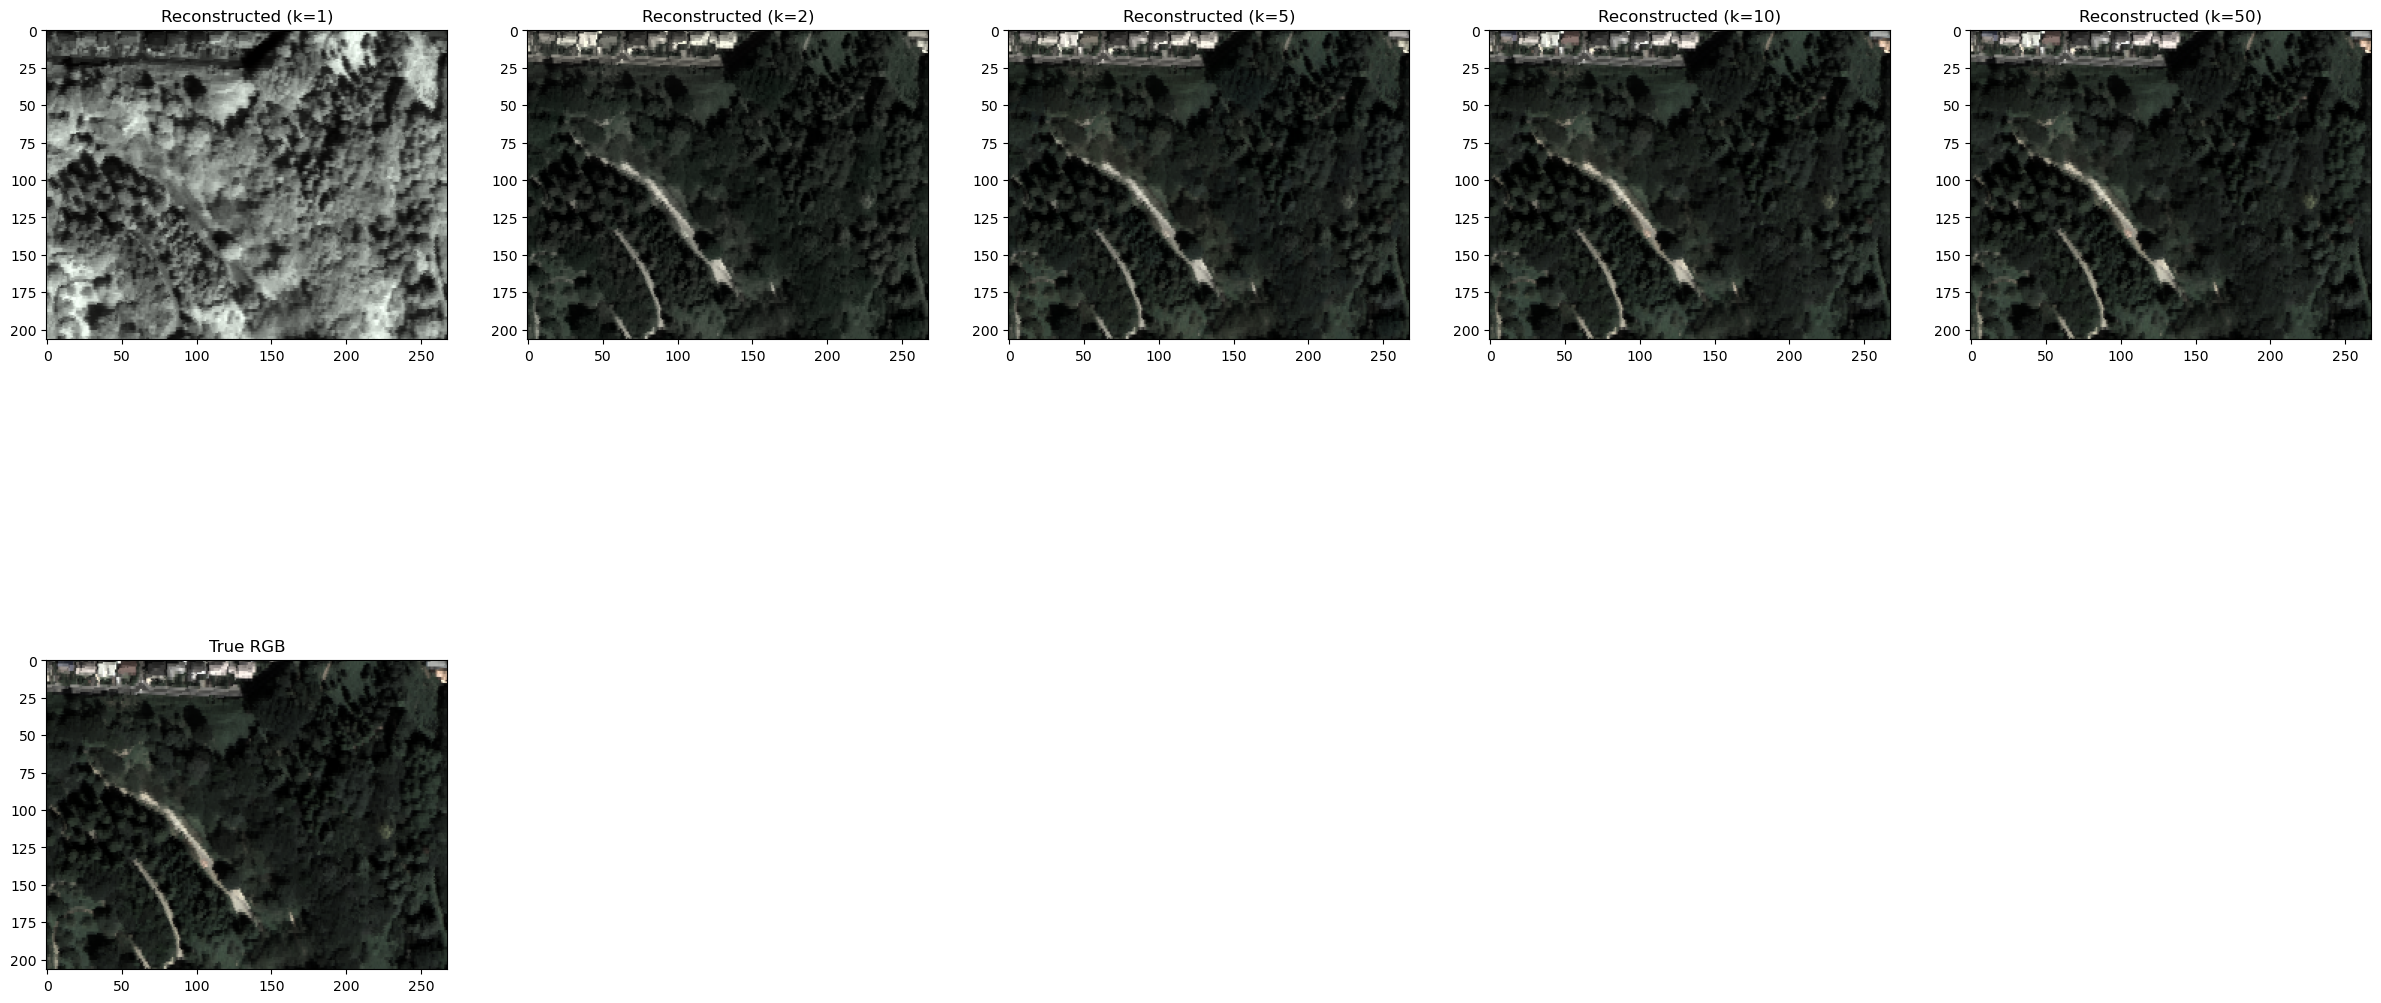

In [15]:
# Reconstruct image from only a few components

pca.fit(reshape_im)
components = pca.components_
scores = pca.transform(reshape_im)
# rgb image bands
rgb_bands = [29, 18, 6]

# Number of rows, columns, and bands in the original hyperspectral image
m, n, L = im.shape

# List of components to consider
k_values = [1, 2, 5, 10, 50]

# Display reconstructed images
plt.figure(figsize=(30, 15))

# Compute the mean vector
mean_vector = np.mean(im, axis=(0, 1))

for i, k in enumerate(k_values):
    # Subset principal components and scores based on k
    components_k = components[:k]
    scores_k = scores[:, :k]

    # Reconstruct image using k components
    reconstructed_image = mean_vector + np.dot(components_k.T, scores_k.T).T

    # Reshape to original dimensions
    rec_im = np.reshape(reconstructed_image, (m, n, L))

    # Visualize reconstructed RGB image
    plt.subplot(2, len(k_values), i + 1)
    plt.imshow(enhance_brightness_rgb(rec_im[:, :, rgb_bands]))
    plt.title(f'Reconstructed (k={k})')

# Visualize the true RGB image
plt.subplot(2, len(k_values), len(k_values) + 1)
plt.imshow(enhance_brightness_rgb(im[:, :, rgb_bands]))
plt.title('True RGB')

plt.show()


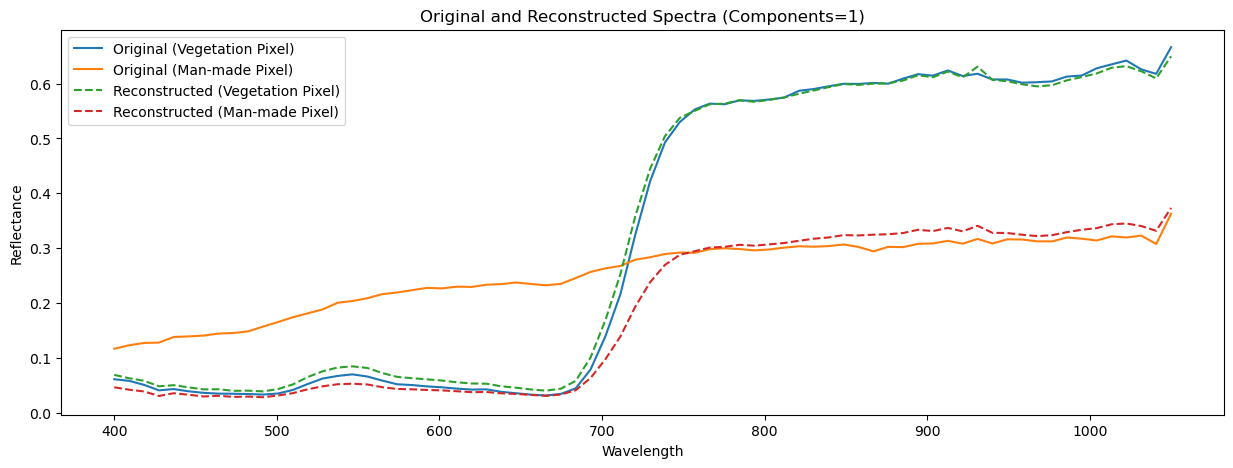

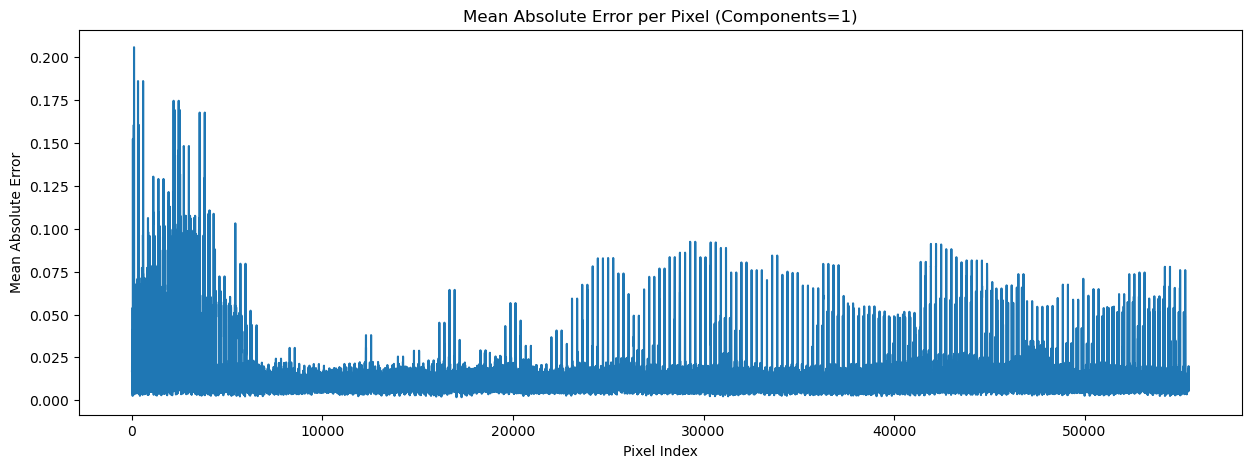

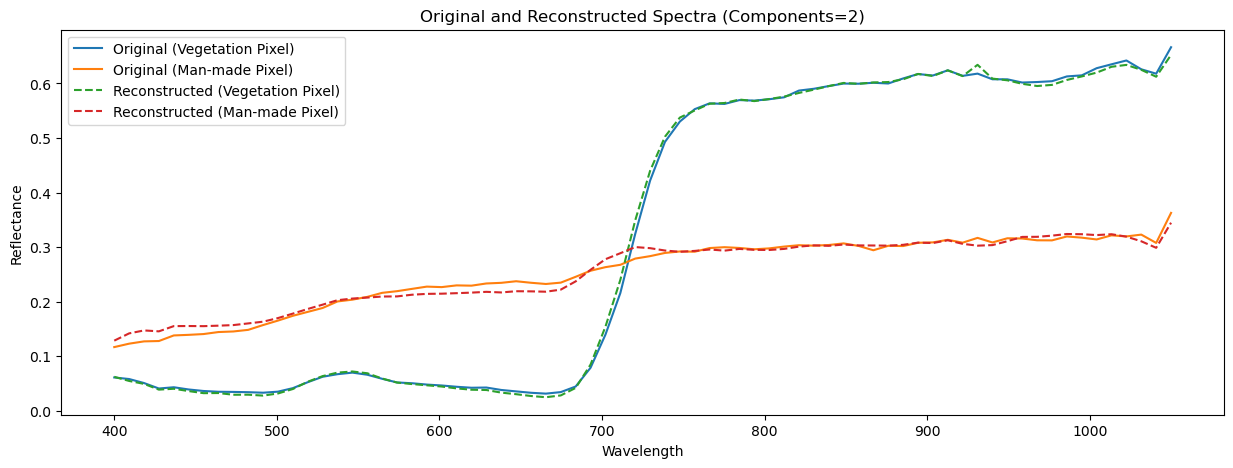

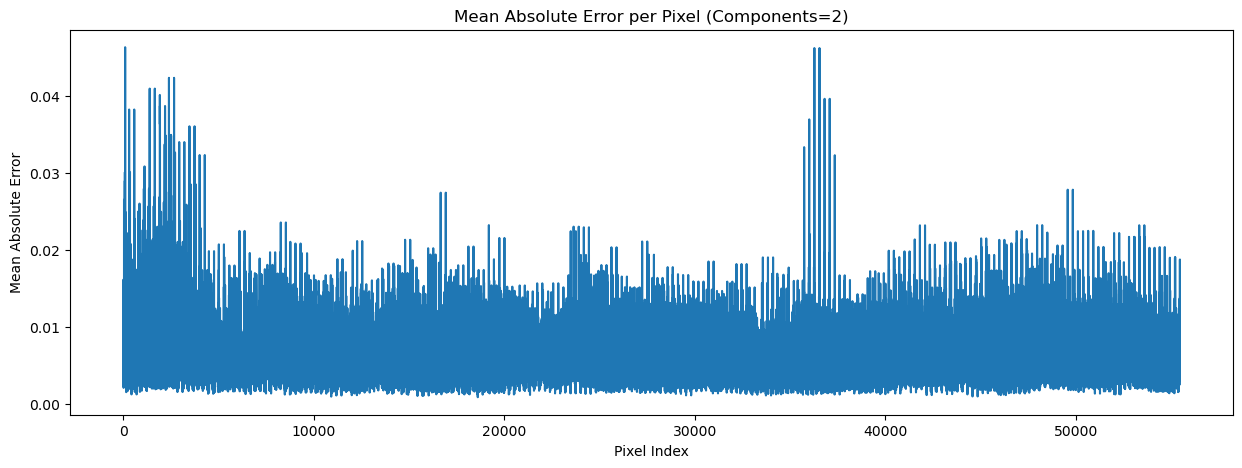

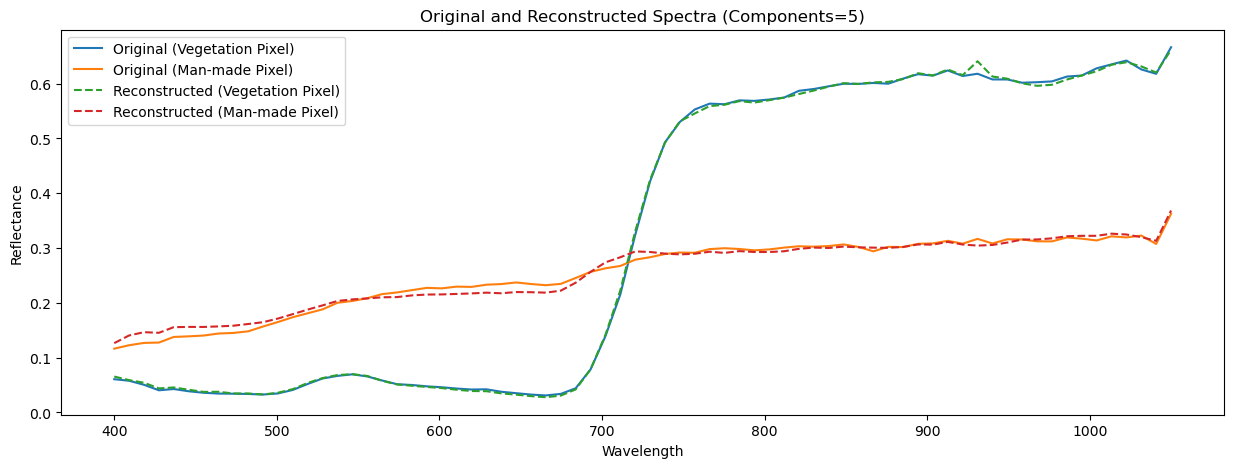

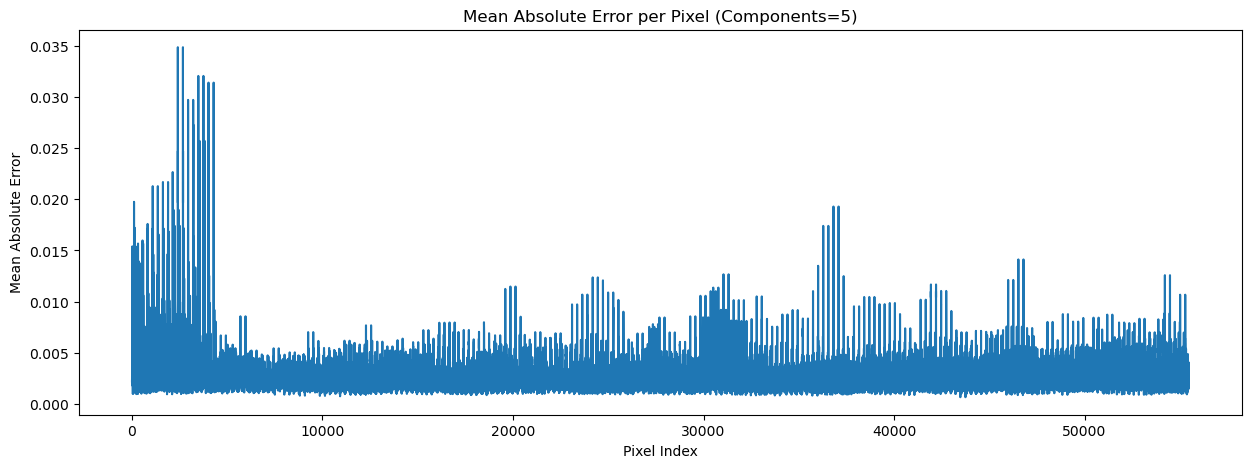

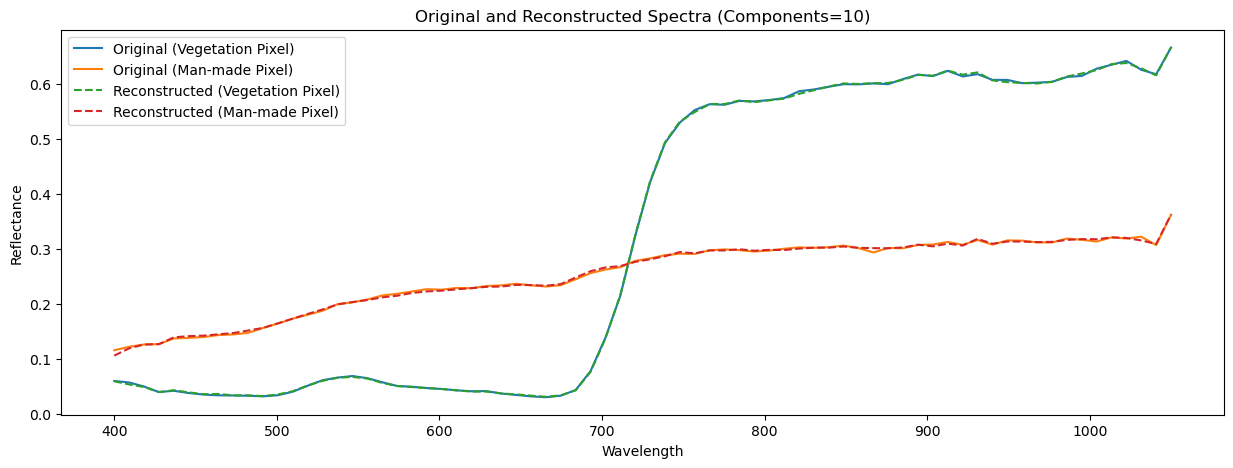

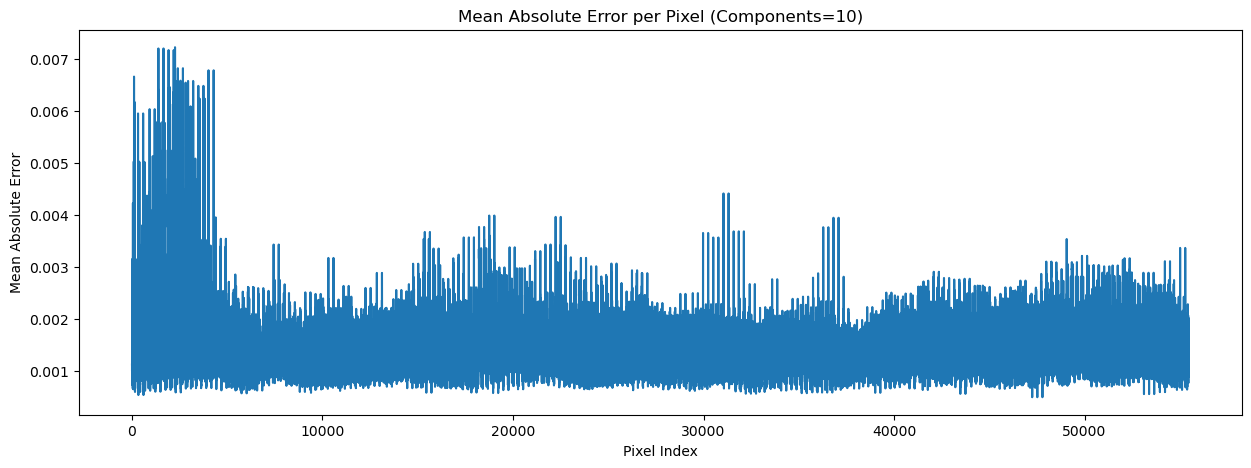

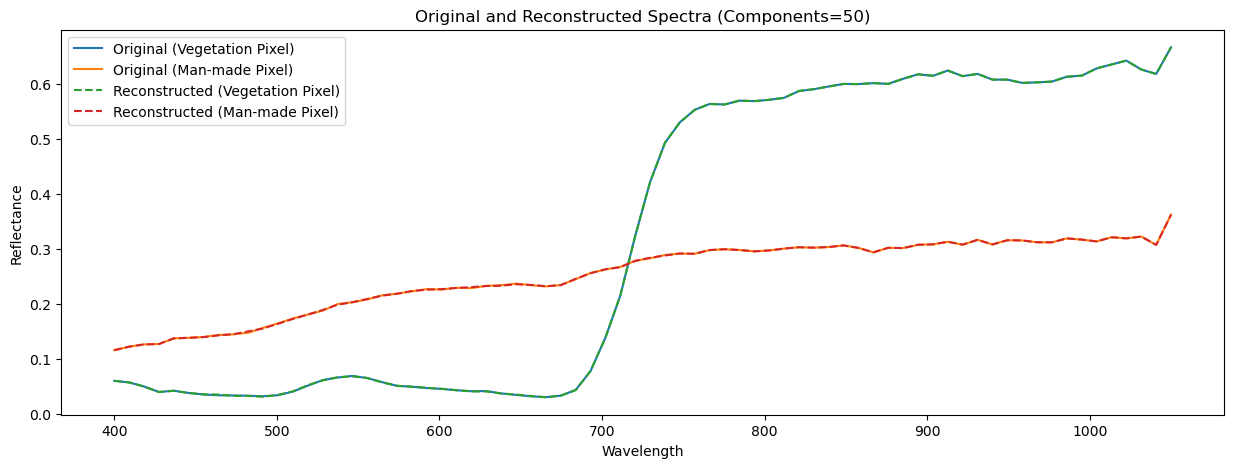

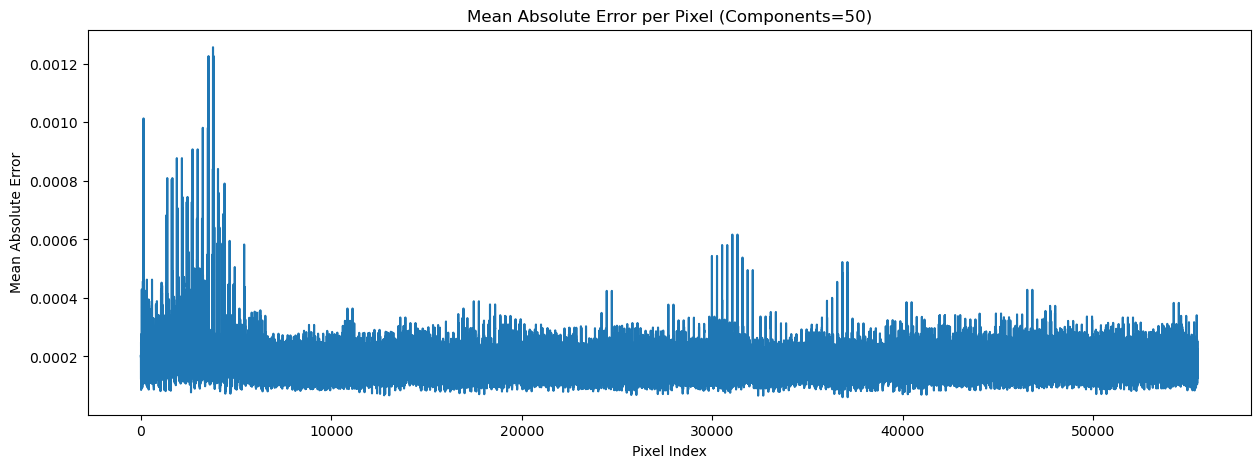

In [16]:
final_nbr_values = [1, 2, 5, 10, 50]

for final_nbr in final_nbr_values:
    # Compute the mean vector
    mean_vector = np.mean(im_r, axis=1)

    # Reconstruct image using the specified number of components
    reconstructed_image_final = mean_vector + np.dot(components[:final_nbr, :].T, scores[:, :final_nbr].T).T
    rec_im_final = np.reshape(reconstructed_image_final, (m, n, L))

    # Absolute difference
    absolute_difference = np.abs(reconstructed_image_final - im_r.T)

    # Mean absolute error in each pixel
    mae_per_pixel = np.mean(absolute_difference, axis=1)

    # Original and reconstructed spectra for two pixels
    plt.figure(figsize=(15, 5))
    plt.plot(wavelengths, im[50, 50, :], label='Original (Vegetation Pixel)')
    plt.plot(wavelengths, im[112, 90, :], label='Original (Man-made Pixel)')
    plt.plot(wavelengths, rec_im_final[50, 50, :], '--', label='Reconstructed (Vegetation Pixel)')
    plt.plot(wavelengths, rec_im_final[112, 90, :], '--', label='Reconstructed (Man-made Pixel)')
    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title(f'Original and Reconstructed Spectra (Components={final_nbr})')
    plt.legend()

    # Display mean absolute error per pixel
    plt.figure(figsize=(15, 5))
    plt.plot(mae_per_pixel)
    plt.xlabel('Pixel Index')
    plt.ylabel('Mean Absolute Error')
    plt.title(f'Mean Absolute Error per Pixel (Components={final_nbr})')

plt.show()


**Q: Finally, take a look at the last components and the associated coefficients. Are the components easy to interpret? How about the coefficients: what do they look like? Is it worth it to keep all the components (give 2 reasons why or why not)**

Here we can see that the last few components has really low effect on explaining the variance and their variance is explained in really low range of bands.

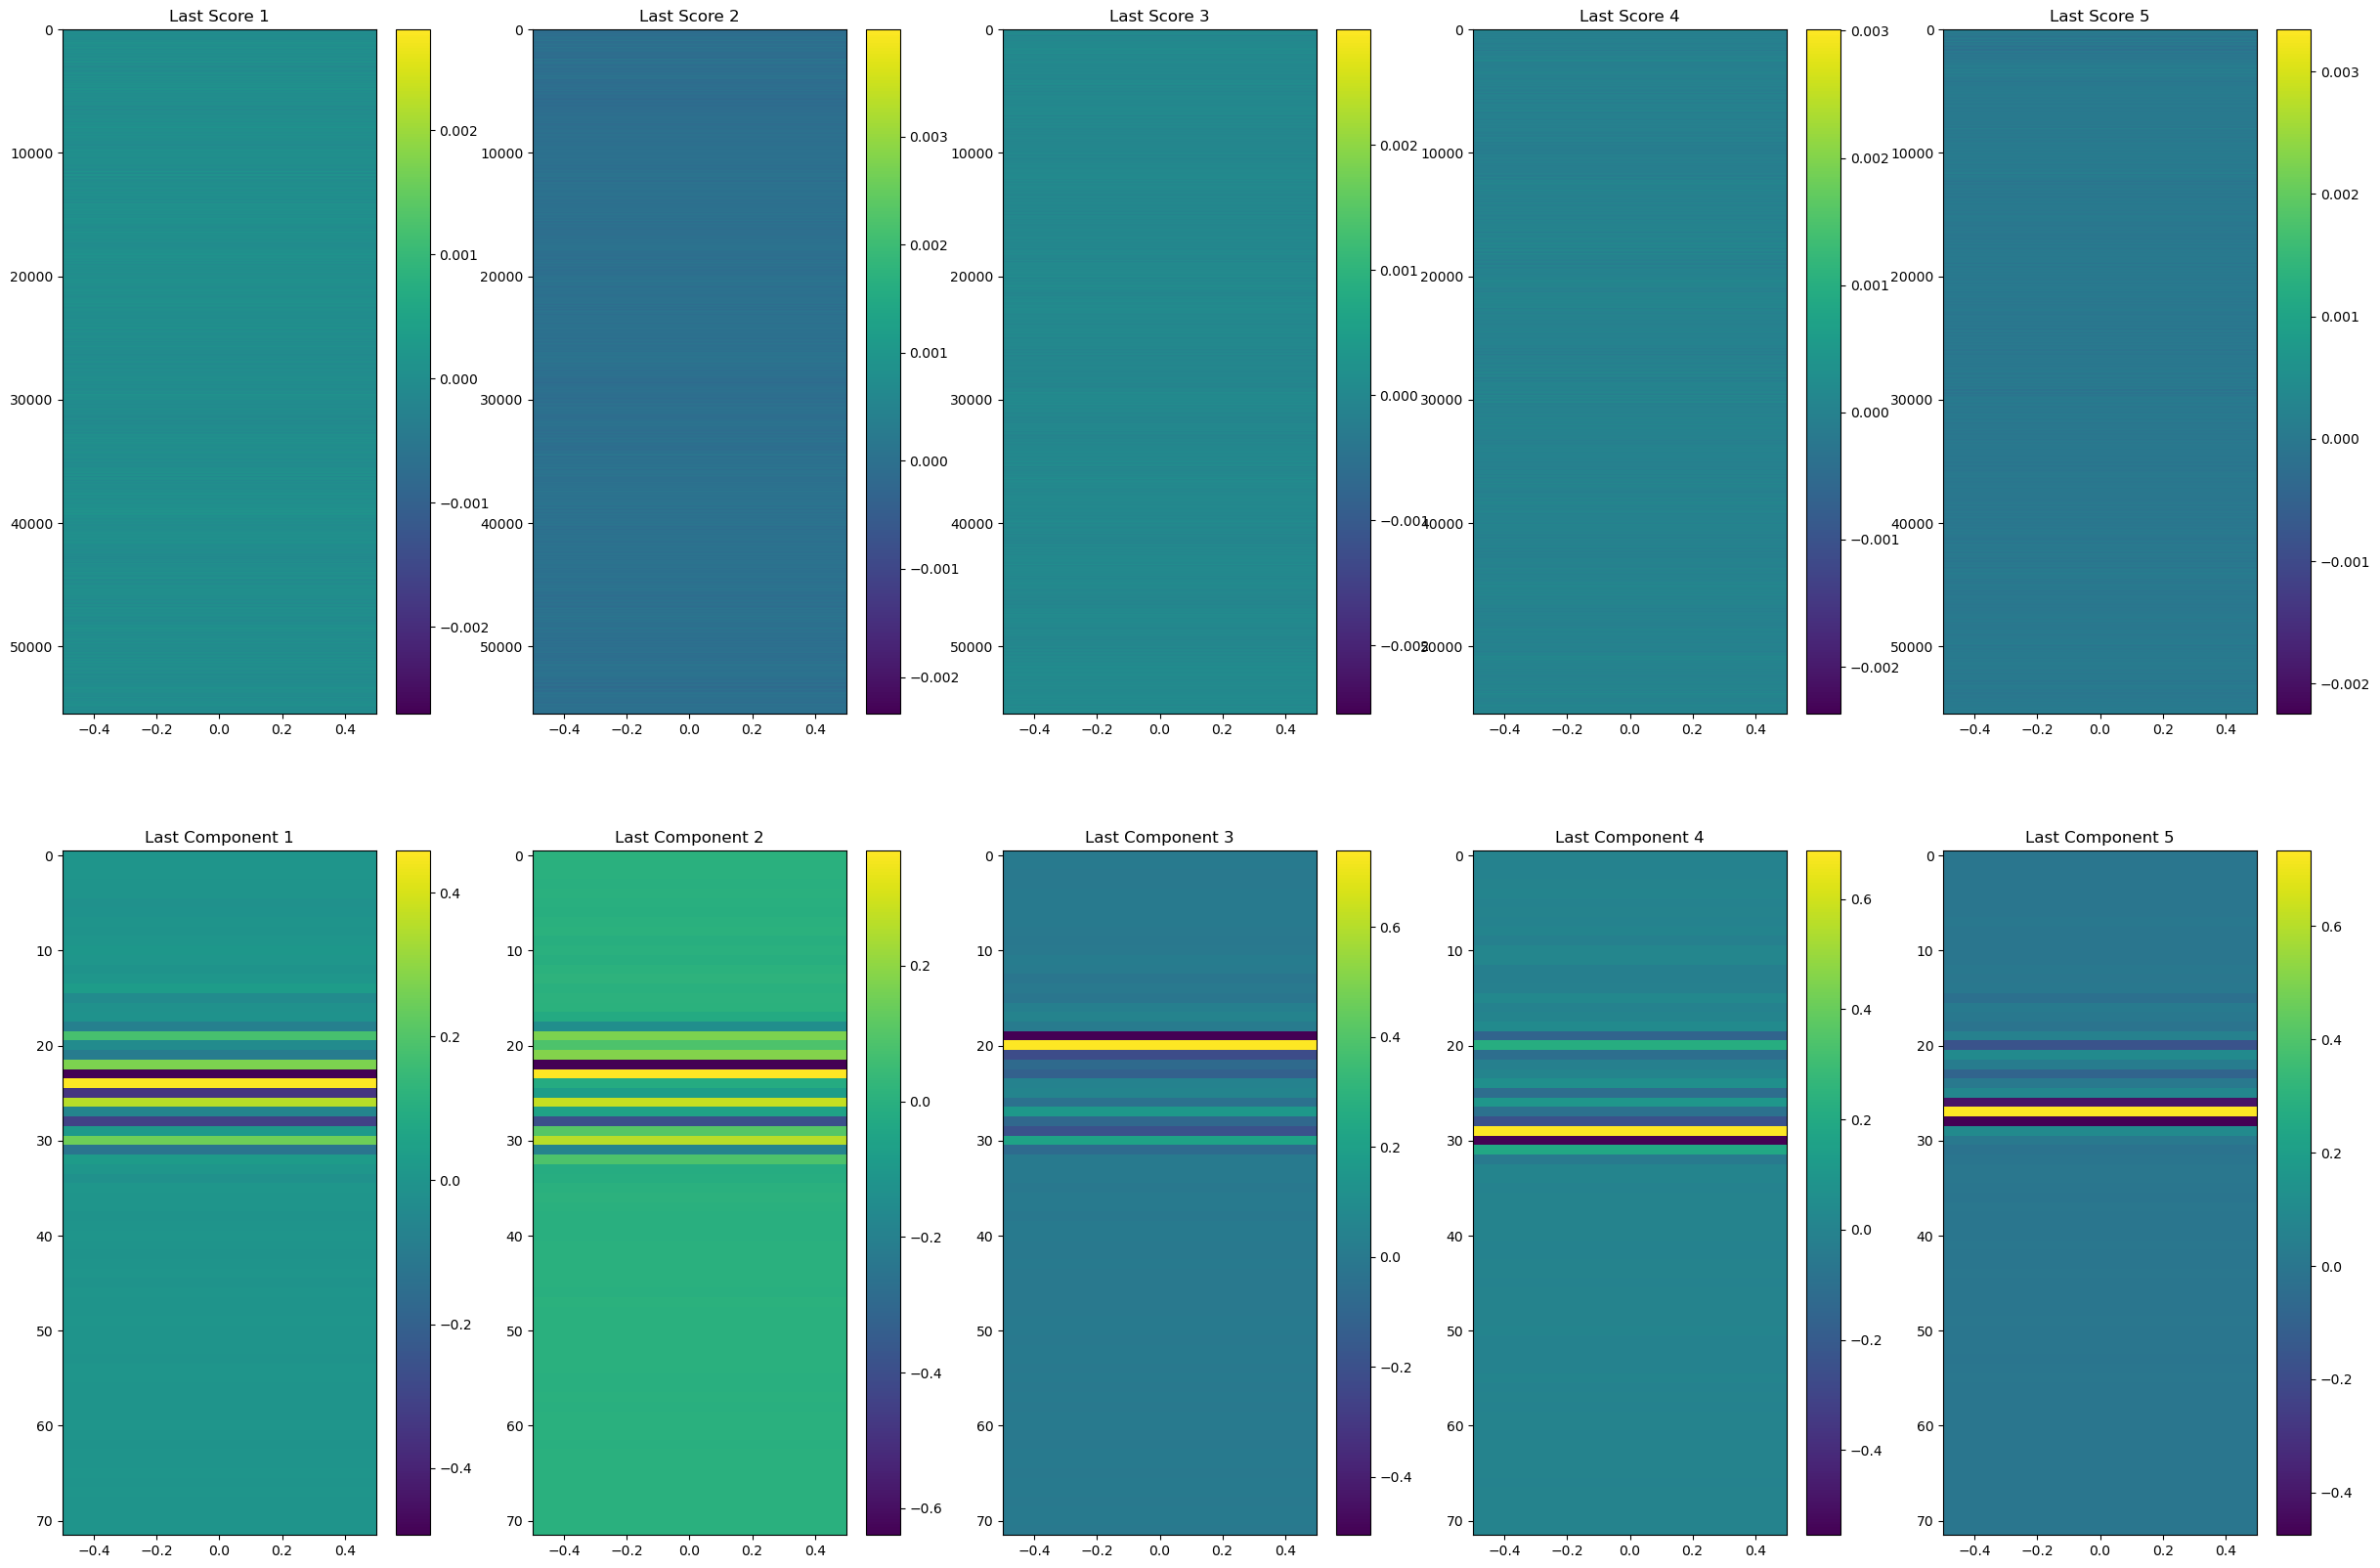

In [17]:
# Display the last components and coefficients
n_last_components_displayed = 5  # You can adjust this based on your preference

# Get the last components
last_components = components[-n_last_components_displayed:]

# Get the corresponding scores (coefficients)
last_scores = scores[:, -n_last_components_displayed:]

# Display both last components and scores together
plt.figure(figsize=(30, 20))

# Plot the last components
for i in range(n_last_components_displayed):
    plt.subplot(2, n_last_components_displayed, n_last_components_displayed + i + 1)
    plt.imshow(last_components[i].reshape(L, 1), cmap='viridis', aspect='auto')  # Adjust the reshape dimensions
    plt.colorbar()
    plt.title(f'Last Component {i + 1}')

# Plot the corresponding last scores (coefficients)
for i in range(n_last_components_displayed):
    plt.subplot(2, n_last_components_displayed, i + 1)
    plt.imshow(last_scores[:, i].reshape(reshape_im.shape[0], 1), cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f'Last Score {i + 1}')

plt.show()



**Q: Bonus: Now perform a new PCA decomposition using only as a dataset the set of labeled pixels. Plot the dataset in the 2D space spanned by the first two components. What can you say about the new components and the separability of both classes rather than in the PCA space of the whole dataset?**

Based on this, it looks like separability is worse when applying PCA to just two classes. Interesting thing is that first component now managed to explain even higher percentage of data, but it is due to our data homogenity as we do not have any man made pixels, but two types of trees i.e. part of the vegetaion material from the image.

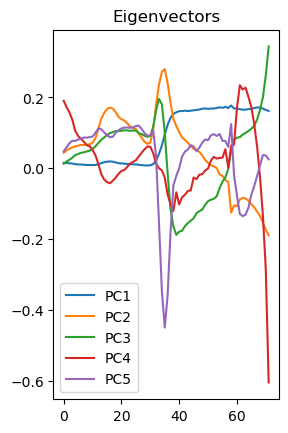

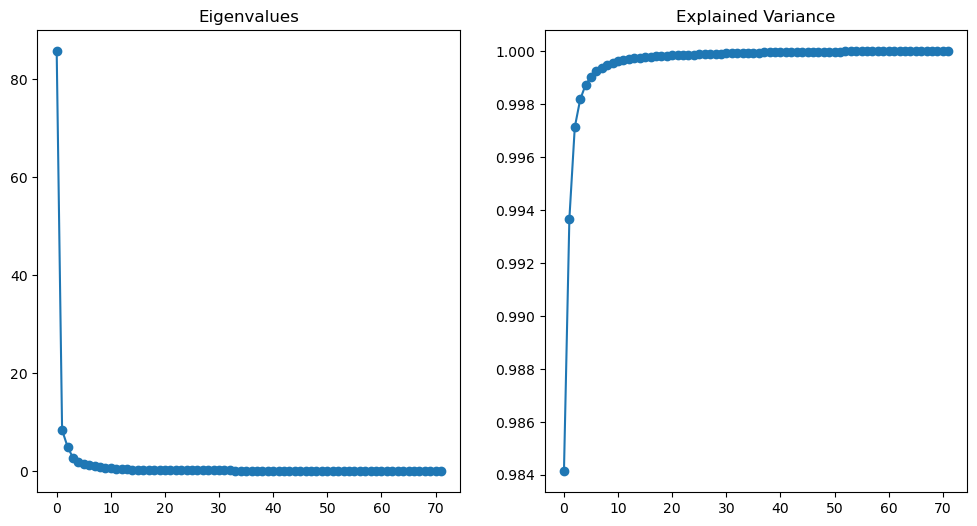

In [18]:
# # %matplotlib qt
# %matplotlib inline

nb_conifer_pixels = np.shape(conifer_pixels[1])
nb_broadleaf_pixels = np.shape(broadleaf_pixels[1])

new_data = np.concatenate((conifer_pixels,broadleaf_pixels),axis = 1)
new_data.shape
new_data = new_data.T
new_data.shape

# Compute the PCA

n_components = 72
pca = PCA(n_components=n_components)

# Fit PCA
pca.fit(new_data)

# Eigen vectors
plt.subplot(1, 2, 2)
for i in range(5):  # Plot the first 5 components (you can adjust this)
    plt.plot(pca.components_[i], label=f'PC{i + 1}')

plt.title('Eigenvectors')
plt.legend()
plt.show()

# Get eigenvalues
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.singular_values_, marker='o')
plt.title('Eigenvalues')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance')
plt.show()




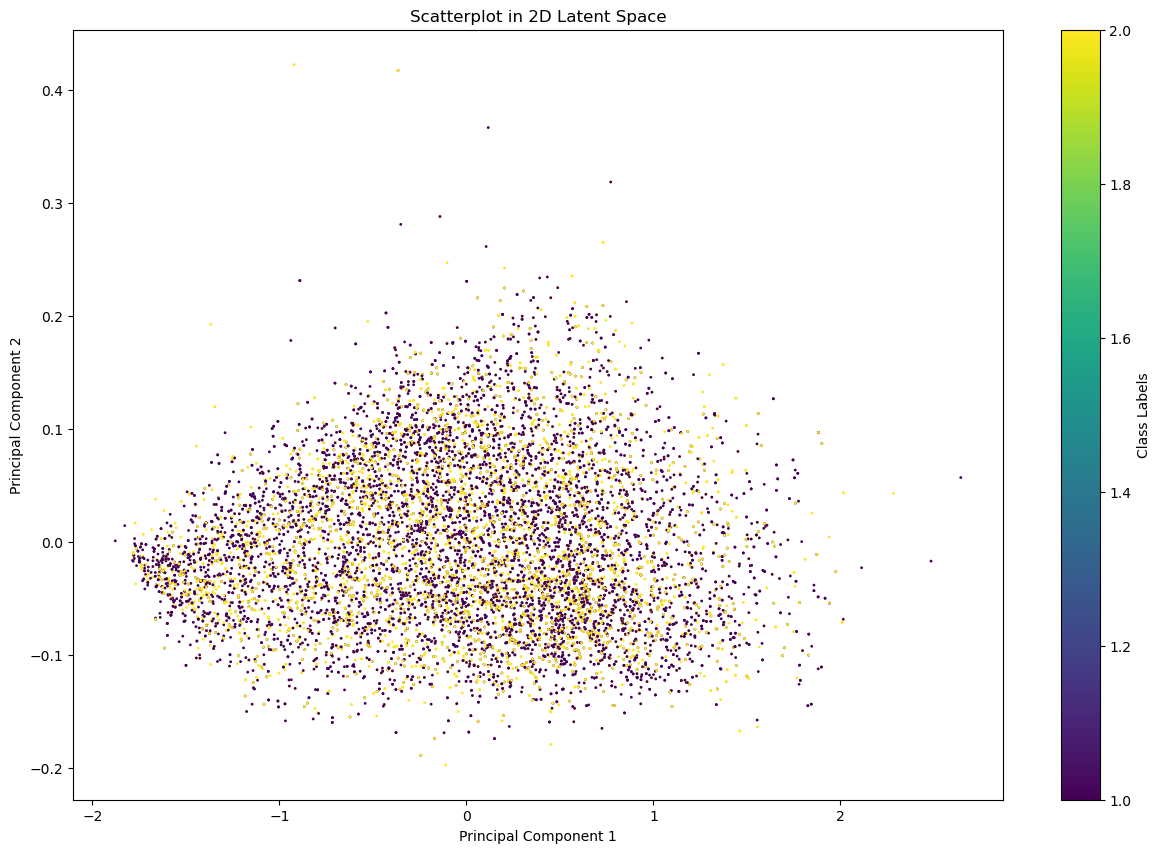

In [19]:
# Project data onto the first 2 principal components
projection_2d = pca.transform(new_data)[:, :2]

# Create a boolean mask to select only values 1 and 2
mask = np.isin(binary_class_img, [1, 2])
filtered = binary_class_img[mask]

# Scatterplot with colors based on filtered binary class labels
plt.figure(figsize=(15, 10))
plt.scatter(projection_2d[:, 0], projection_2d[:, 1], c=filtered,s = 1)

# Add labels and a colorbar
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot in 2D Latent Space')
plt.colorbar(label='Class Labels')

plt.show()